In [1]:
import warnings

import iris


url = ('http://tds.marine.rutgers.edu/thredds/dodsC/roms/espresso/2013_da/avg/'
       'ESPRESSO_Real-Time_v2_Averages_Best')


with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    cubes = iris.load_raw(url)

In [2]:
salt = cubes.extract_strict('sea_water_salinity')[-1, ...]  # Last time step.

lon = salt.coord(axis='X').points
lat = salt.coord(axis='Y').points

In [3]:
p = salt.coord('sea_surface_height_above_reference_ellipsoid').points
q = salt.data

In [4]:
import numpy as np

from ciso import zslice

p0 = -250

isoslice = zslice(q.astype(np.float64), p, p0)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt


import cartopy.crs as ccrs
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

extent = [lon.min(), lon.max(),
          lat.min(), lat.max()]

cmap = plt.cm.viridis

def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(9, 13),
                           subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.set_extent(extent)
    ax.coastlines('50m')
    return fig, ax

/home/filipe/miniconda/envs/IOOS/lib/python2.7/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


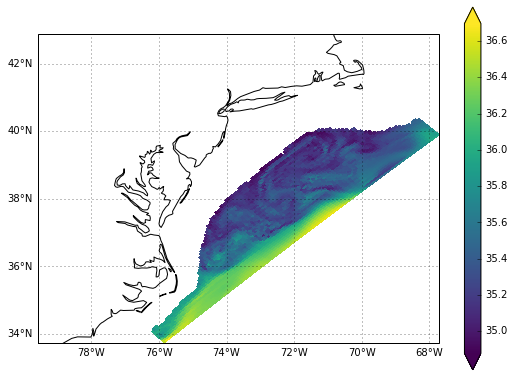

In [6]:
import numpy.ma as ma

fig, ax = make_map()

cs = ax.pcolormesh(lon, lat, ma.masked_invalid(isoslice), cmap=cmap)

kw = dict(shrink=0.5, orientation='vertical', extend='both')
cbar = fig.colorbar(cs, **kw)